In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
csv_species = "Resources/cleaned_species.csv"
csv_parks = "Resources/cleaned_park.csv"

In [3]:
df_species = pd.read_csv(csv_species, engine='python')
df_parks = pd.read_csv(csv_parks, engine='python')

In [4]:
df_species.head()

,Park Name,Category,Family,Scientific Name,Common Names
0,Acadia National Park,Mammal,Cervidae,Alces alces,Moose
1,Acadia National Park,Mammal,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi..."
2,Acadia National Park,Mammal,Canidae,Canis latrans,"Coyote, Eastern Coyote"
3,Acadia National Park,Mammal,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf"
4,Acadia National Park,Mammal,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re..."


In [5]:
df_species.rename(columns={'Park Name': 'Park_Name'}, inplace=True)

In [6]:
df_species.head()

,Park_Name,Category,Family,Scientific Name,Common Names
0,Acadia National Park,Mammal,Cervidae,Alces alces,Moose
1,Acadia National Park,Mammal,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi..."
2,Acadia National Park,Mammal,Canidae,Canis latrans,"Coyote, Eastern Coyote"
3,Acadia National Park,Mammal,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf"
4,Acadia National Park,Mammal,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re..."


In [7]:
df_parks.head()

,Park Code,Park_Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [8]:
df_parks.nunique()


Park Code     56
Park_Name     56
State         27
Acres         55
Latitude      53
Longitude     55
dtype: int64

In [9]:
df_parks_modified = df_parks.drop(['Park Code'], axis=1)

In [10]:
df_parks_modified.head()

,Park_Name,State,Acres,Latitude,Longitude
0,Acadia National Park,ME,47390,44.35,-68.21
1,Arches National Park,UT,76519,38.68,-109.57
2,Badlands National Park,SD,242756,43.75,-102.50
3,Big Bend National Park,TX,801163,29.25,-103.25
4,Biscayne National Park,FL,172924,25.65,-80.08


In [11]:
merged_df = pd.merge(df_species, df_parks_modified, on='Park_Name', how='inner')
merged_df

,Park_Name,Category,Family,Scientific Name,Common Names,State,Acres,Latitude,Longitude
0,Acadia National Park,Mammal,Cervidae,Alces alces,Moose,ME,47390,44.35,-68.21
1,Acadia National Park,Mammal,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",ME,47390,44.35,-68.21
2,Acadia National Park,Mammal,Canidae,Canis latrans,"Coyote, Eastern Coyote",ME,47390,44.35,-68.21
3,Acadia National Park,Mammal,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",ME,47390,44.35,-68.21
4,Acadia National Park,Mammal,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",ME,47390,44.35,-68.21
...,...,...,...,...,...,...,...,...,...
119243,Zion National Park,Vascular Plant,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,UT,146598,37.30,-113.05
119244,Zion National Park,Vascular Plant,Vitaceae,Vitis arizonica,Canyon Grape,UT,146598,37.30,-113.05
119245,Zion National Park,Vascular Plant,Vitaceae,Vitis vinifera,Wine Grape,UT,146598,37.30,-113.05
119246,Zion National Park,Vascular Plant,Zygophyllaceae,Larrea tridentata,Creosote Bush,UT,146598,37.30,-113.05


In [12]:
species_parks_df =  pd.DataFrame(merged_df, columns=["Scientific Name", "Park_Name"])
species_parks_df

,Scientific Name,Park_Name
0,Alces alces,Acadia National Park
1,Odocoileus virginianus,Acadia National Park
2,Canis latrans,Acadia National Park
3,Canis lupus,Acadia National Park
4,Vulpes vulpes,Acadia National Park
...,...,...
119243,Solanum triflorum,Zion National Park
119244,Vitis arizonica,Zion National Park
119245,Vitis vinifera,Zion National Park
119246,Larrea tridentata,Zion National Park


In [13]:
species_parks_grouped_df = species_parks_df.groupby(['Scientific Name']).count()
species_parks_grouped_df

,Park_Name
Scientific Name,
Aaptolasma,1
Abacidus,1
Abaeis nicippe,3
Abagrotis discoidalis,1
Abagrotis duanca,1
...,...
Zyxaphis filifoliae,1
"nr. Bledius, sp.111",1
nr. Cercyon sp. 26,1


In [14]:
species_parks_grouped_df.sort_values(by='Park_Name', ascending=False)

,Park_Name
Scientific Name,
Falco peregrinus,56
Circus cyaneus,55
Tachycineta bicolor,54
Accipiter striatus,54
Pandion haliaetus,54
...,...
Gymnodinium,1
Gymnoderma lineare,1
Gymnocolea acutiloba,1


In [15]:
main_species_df = species_parks_grouped_df.loc[species_parks_grouped_df['Park_Name'] > 50]

In [16]:
main_species_df

,Park_Name
Scientific Name,
Accipiter striatus,54
Anas platyrhynchos,53
Ardea herodias,51
Branta canadensis,53
Bubo virginianus,52
Buteo jamaicensis,52
Catharus guttatus,51
Circus cyaneus,55
Colaptes auratus,52


In [17]:
main_species_df.sort_values(by='Park_Name', ascending=False)

,Park_Name
Scientific Name,
Falco peregrinus,56
Circus cyaneus,55
Accipiter striatus,54
Tachycineta bicolor,54
Pandion haliaetus,54
Regulus calendula,53
Melospiza lincolnii,53
Anas platyrhynchos,53
Turdus migratorius,53


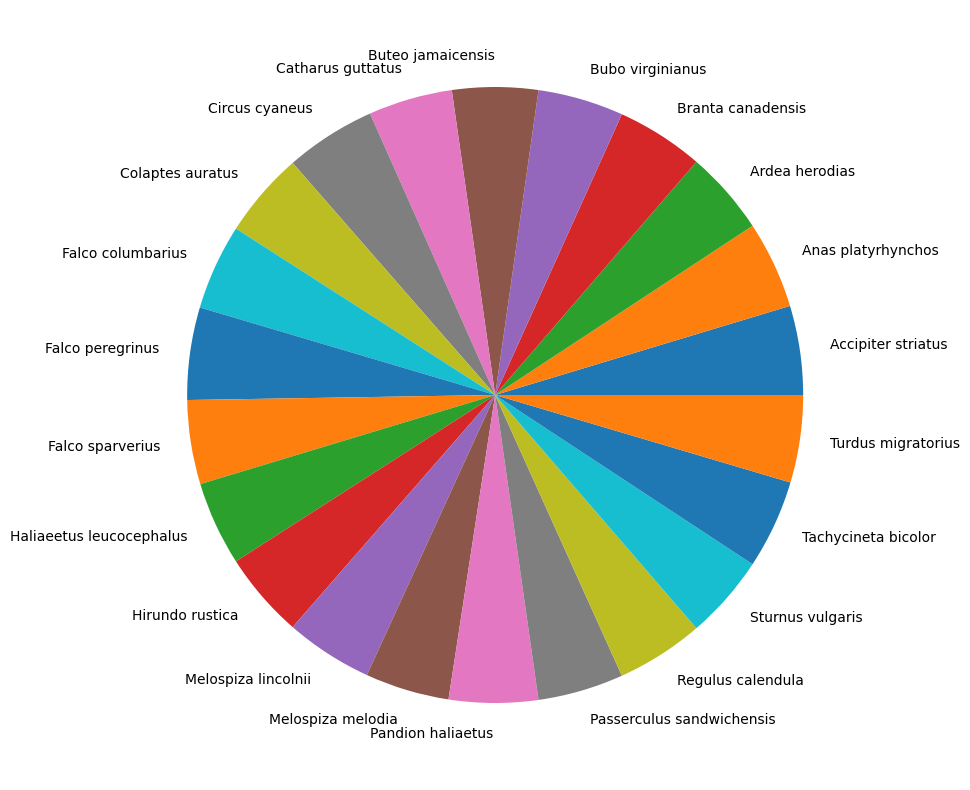

In [18]:
plot = main_species_df.plot.pie(y='Park_Name', figsize=(10, 10), legend = False )


plot.yaxis.set_visible(False)


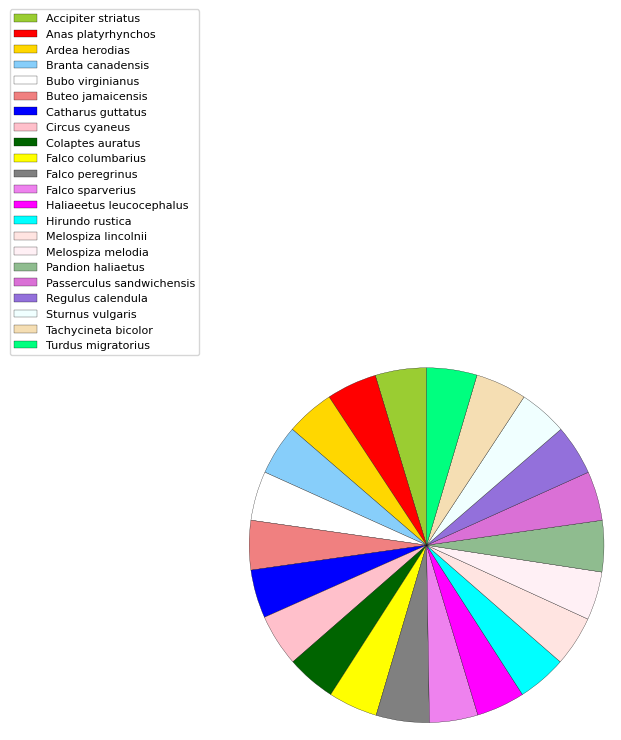

In [19]:
x = list(main_species_df.index.values)

y = main_species_df["Park_Name"]
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey',
          'violet','magenta','cyan','mistyrose','lavenderblush','darkseagreen','orchid','mediumpurple',
          'azure','wheat','springgreen']


patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2,
                         wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0.2,
                      'antialiased': True})
labels = x



plt.legend(patches, labels, loc='lower right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

In [20]:
unique_species_df = species_parks_grouped_df.loc[species_parks_grouped_df['Park_Name'] == 1]
unique_species_df

,Park_Name
Scientific Name,
Aaptolasma,1
Abacidus,1
Abagrotis discoidalis,1
Abagrotis duanca,1
Abagrotis vittifrons,1
...,...
Zyxaphis filifoliae,1
"nr. Bledius, sp.111",1
nr. Cercyon sp. 26,1


In [21]:
state_species_df =  pd.DataFrame(merged_df, columns=["State","Scientific Name"])
state_species_df

,State,Scientific Name
0,ME,Alces alces
1,ME,Odocoileus virginianus
2,ME,Canis latrans
3,ME,Canis lupus
4,ME,Vulpes vulpes
...,...,...
119243,UT,Solanum triflorum
119244,UT,Vitis arizonica
119245,UT,Vitis vinifera
119246,UT,Larrea tridentata


In [22]:
state_species_grouped_df = state_species_df.groupby(['State']).count()

state_species_grouped_df

,Scientific Name
State,
AK,11740
AR,1950
AZ,5309
CA,17785
"CA, NV",4439
CO,6453
FL,4658
HI,5878
KY,2499


In [23]:
state_species_grouped_df.reset_index(inplace=True)


state_species_grouped_df

,State,Scientific Name
0,AK,11740
1,AR,1950
2,AZ,5309
3,CA,17785
4,"CA, NV",4439
5,CO,6453
6,FL,4658
7,HI,5878
8,KY,2499
9,ME,1709


In [24]:
state_species_grouped_df2 = state_species_grouped_df.drop([4,20,26], axis=0, inplace=False)
state_species_grouped_df2

,State,Scientific Name
0,AK,11740
1,AR,1950
2,AZ,5309
3,CA,17785
5,CO,6453
6,FL,4658
7,HI,5878
8,KY,2499
9,ME,1709
10,MI,1397


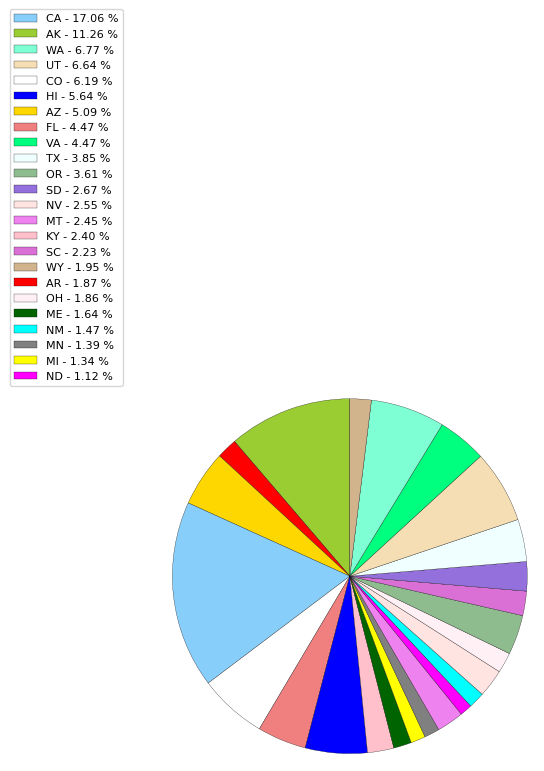

In [27]:
x = state_species_grouped_df2["State"]
y = state_species_grouped_df2["Scientific Name"]
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey',
          'violet','magenta','cyan','mistyrose','lavenderblush','darkseagreen','orchid','mediumpurple',
          'azure','wheat','springgreen','aquamarine','tan']

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2,
                        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0.2,
                      'antialiased': True})
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart_states.png', bbox_inches='tight')